## Dinucleotide mutational fequencies in dsDNA viruses fed into unsupervised learning algortithms for clsutering

In [1]:
cd /Users/belfordak/Desktop/ML_mutation_viral_taxonomy/April_2019/

/Users/belfordak/Desktop/ML_mutation_viral_taxonomy/April_2019


In [2]:
import Bio
import Bio.Seq
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

def make_rc_record(record):
    """Returns a new SeqRecord with the reverse complement sequence."""
    return SeqRecord(seq = record.seq.reverse_complement(), \
                 id = "rc_" + record.id, \
                 description = "reverse complement")

In [3]:
#remeber: run Gabe's perl script on the cluster, then out file goes here

In [4]:
import pandas as pd
import numpy as np

all_viruses = pd.read_csv("./input_data/JC_BK_disease_Hpyv7.fasta.full.txt", header = None, sep='\t', names = ["id #", "dinucl", "frequency", "actual id"])

all_viruses.columns = ["nucl", "frequency", "id #", "actual id"]
no_RC = pd.DataFrame(all_viruses.iloc[:,0:3])
#no_RC.index = no_RC['nucl']
print(no_RC)


     nucl  frequency        id #
1      GA   0.849894  AB372038.1
1      CC   1.270099  AB372038.1
1      TC   0.852029  AB372038.1
1      TA   0.709953  AB372038.1
1      CT   1.153316  AB372038.1
1      AG   1.198318  AB372038.1
1      CA   1.303517  AB372038.1
1      AA   1.195743  AB372038.1
1      TG   1.208599  AB372038.1
1      AT   0.780072  AB372038.1
1      GC   1.184331  AB372038.1
1      CG   0.067401  AB372038.1
1      GT   0.811033  AB372038.1
1      TT   1.241329  AB372038.1
1      AC   0.842477  AB372038.1
1      GG   1.313962  AB372038.1
1     CTG   1.223603  AB372038.1
1     TAT   1.165895  AB372038.1
1     AGC   0.908437  AB372038.1
1     GAA   1.010136  AB372038.1
1     GGC   0.943762  AB372038.1
1     CAT   1.025996  AB372038.1
1     TGT   0.999102  AB372038.1
1     GCC   0.914305  AB372038.1
1     TAA   0.927466  AB372038.1
1     ACG   1.149606  AB372038.1
1     ACA   1.146681  AB372038.1
1     TCT   1.113385  AB372038.1
1     CGC   0.906794  AB372038.1
1     CCG 

In [5]:
import numpy as np
#pivoting, like melting, data for column selction to new df 
df = no_RC.pivot(index='id #', columns='nucl', values='frequency') 
df2 = no_RC.pivot(index='nucl', columns='id #', values='frequency')
df22 = df2.iloc[1:] 
df22.head()

id #,AB038249.1,AB038250.1,AB038251.1,AB038252.1,AB038253.1,AB038254.1,AB038255.1,AB048545.1,AB048546.1,AB048547.1,...,MF662208.1,MG674199.1,NC_001538.1,NC_001699.1,NC_014407.1,U61771.1,U73500.1,U73501.1,U73502.1,V01109.1
nucl,,,,,,,,,,,,,,,,,,,,,
AAA,1.161394,1.149894,1.157830,1.193820,1.184773,1.135101,1.160683,1.192506,1.191252,1.171192,...,1.177252,1.107261,1.195545,1.156721,1.116071,1.174010,1.161831,1.168046,1.181430,1.219564
AAC,0.989054,0.974209,0.914587,0.915045,0.923953,0.951587,0.976099,0.915750,0.936256,0.946565,...,0.905514,0.840072,0.859224,0.915775,0.853365,0.926441,0.944650,0.925242,0.944377,0.889207
AAG,0.893089,0.898245,0.922509,0.887829,0.906615,0.941747,0.910253,0.886098,0.881644,0.892424,...,0.908282,0.842469,0.863687,0.938953,0.844595,0.889744,0.901821,0.911648,0.874466,0.815798
AAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dftest_T= df22.T
dftest_T.head()

nucl,AAA,AAC,AAG,AAN,AAS,AAT,AC,ACA,ACC,ACG,...,TTA,TTC,TTG,TTN,TTT,TTY,TY,TYA,YA,YAT
id #,,,,,,,,,,,,,,,,,,,,,
AB038249.1,1.161394,0.989054,0.893089,NaN,NaN,0.873995,0.848938,1.118642,0.902455,1.140634,...,0.896267,1.179307,0.763443,NaN,1.133600,NaN,NaN,NaN,NaN,NaN
AB038250.1,1.149894,0.974209,0.898245,NaN,NaN,0.894493,0.847139,1.113480,0.915598,1.139509,...,0.903149,1.147913,0.766454,NaN,1.138330,NaN,NaN,NaN,NaN,NaN
AB038251.1,1.157830,0.914587,0.922509,NaN,NaN,0.902687,0.835469,1.152602,0.902742,1.267090,...,0.908834,1.121560,0.766767,NaN,1.148444,NaN,NaN,NaN,NaN,NaN
AB038252.1,1.193820,0.915045,0.887829,NaN,NaN,0.885916,0.845010,1.078086,0.957529,1.250000,...,0.881881,1.121657,0.758728,NaN,1.163550,NaN,NaN,NaN,NaN,NaN
AB038253.1,1.184773,0.923953,0.906615,NaN,NaN,0.874170,0.854382,1.096635,0.917981,1.319285,...,0.873908,1.096966,0.771893,NaN,1.174416,NaN,NaN,NaN,NaN,NaN


In [7]:
#Now sepreating out di and tri nucls

In [8]:
#dftest_T.index
dftest_T.columns

Index(['AAA', 'AAC', 'AAG', 'AAN', 'AAS', 'AAT', 'AC', 'ACA', 'ACC', 'ACG',
       ...
       'TTA', 'TTC', 'TTG', 'TTN', 'TTT', 'TTY', 'TY', 'TYA', 'YA', 'YAT'],
      dtype='object', name='nucl', length=140)

In [9]:
list(dftest_T.filter(regex='N'))

['AAN',
 'AN',
 'ANG',
 'ANN',
 'ANT',
 'CAN',
 'CCN',
 'CN',
 'CNC',
 'GGN',
 'GN',
 'GNN',
 'GTN',
 'NC',
 'NCA',
 'NCC',
 'NG',
 'NGA',
 'NGC',
 'NGG',
 'NN',
 'NNC',
 'NNG',
 'NNN',
 'NNT',
 'NT',
 'NTA',
 'NTC',
 'NTG',
 'TGN',
 'TN',
 'TNG',
 'TNN',
 'TTN']

In [10]:
#Now filter out any "N"ds or "S"s
#for dinucl
temp = dftest_T[dftest_T.columns.drop(list(dftest_T.filter(regex='N')))]
print(temp.shape)

temp2 = temp[temp.columns.drop(list(temp.filter(regex='S|n|Y|R|W|V|P|M|Q|L|K|F|I|D|H|E')))]


#print(temp5.columns)
print(temp2)
yy = temp2

yy.to_csv("./di_and_tri_nucls.csv")

(1154, 106)
nucl              AAA       AAC       AAG       AAT        AC       ACA  \
id #                                                                      
AB038249.1   1.161394  0.989054  0.893089  0.873995  0.848938  1.118642   
AB038250.1   1.149894  0.974209  0.898245  0.894493  0.847139  1.113480   
AB038251.1   1.157830  0.914587  0.922509  0.902687  0.835469  1.152602   
AB038252.1   1.193820  0.915045  0.887829  0.885916  0.845010  1.078086   
AB038253.1   1.184773  0.923953  0.906615  0.874170  0.854382  1.096635   
AB038254.1   1.135101  0.951587  0.941747  0.885834  0.846182  1.144161   
AB038255.1   1.160683  0.976099  0.910253  0.864901  0.859705  1.116459   
AB048545.1   1.192506  0.915750  0.886098  0.889573  0.844430  1.080808   
AB048546.1   1.191252  0.936256  0.881644  0.880084  0.850447  1.082225   
AB048547.1   1.171192  0.946565  0.892424  0.889538  0.855230  1.126499   
AB048548.1   1.139543  0.955732  0.914371  0.908211  0.846001  1.117949   
AB048549.1   

In [11]:
two = pd.Series(yy.columns.str.len() == 2)
three = pd.Series(yy.columns.str.len() == 3)

In [12]:
#retranspose again b/c first time retain original indecies, so that's why it's weird above. anyway..
#two_df = dftest[two.values].T
three_df = yy.T
print(three_df.columns)

Index(['AB038249.1', 'AB038250.1', 'AB038251.1', 'AB038252.1', 'AB038253.1',
       'AB038254.1', 'AB038255.1', 'AB048545.1', 'AB048546.1', 'AB048547.1',
       ...
       'MF662208.1', 'MG674199.1', 'NC_001538.1', 'NC_001699.1', 'NC_014407.1',
       'U61771.1', 'U73500.1', 'U73501.1', 'U73502.1', 'V01109.1'],
      dtype='object', name='id #', length=1154)


In [13]:
print(three_df[three.values]) #two.values

id #  AB038249.1  AB038250.1  AB038251.1  AB038252.1  AB038253.1  AB038254.1  \
nucl                                                                           
AAA     1.161394    1.149894    1.157830    1.193820    1.184773    1.135101   
AAC     0.989054    0.974209    0.914587    0.915045    0.923953    0.951587   
AAG     0.893089    0.898245    0.922509    0.887829    0.906615    0.941747   
AAT     0.873995    0.894493    0.902687    0.885916    0.874170    0.885834   
ACA     1.118642    1.113480    1.152602    1.078086    1.096635    1.144161   
ACC     0.902455    0.915598    0.902742    0.957529    0.917981    0.867514   
ACG     1.140634    1.139509    1.267090    1.250000    1.319285    1.133080   
ACT     0.937399    0.929852    0.893595    0.932584    0.939714    0.926075   
AGA     1.044850    1.034107    1.002896    0.994390    0.997062    0.991121   
AGC     0.897452    0.890287    0.936036    0.950741    0.944380    0.947556   
AGG     1.016824    1.046091    0.985825

In [14]:
#testcol = three_df['AAA'].div(three_df.groupby.cols['AAA'].shift(4))
#print(testcol.head())
#print(three_df['AAA'].shift(4))
print(three_df)
three_df.to_csv("/Users/belfordak/Desktop/ML_mutation_viral_taxonomy/April_2019/three_df_April2019.csv")

id #  AB038249.1  AB038250.1  AB038251.1  AB038252.1  AB038253.1  AB038254.1  \
nucl                                                                           
AAA     1.161394    1.149894    1.157830    1.193820    1.184773    1.135101   
AAC     0.989054    0.974209    0.914587    0.915045    0.923953    0.951587   
AAG     0.893089    0.898245    0.922509    0.887829    0.906615    0.941747   
AAT     0.873995    0.894493    0.902687    0.885916    0.874170    0.885834   
AC      0.848938    0.847139    0.835469    0.845010    0.854382    0.846182   
ACA     1.118642    1.113480    1.152602    1.078086    1.096635    1.144161   
ACC     0.902455    0.915598    0.902742    0.957529    0.917981    0.867514   
ACG     1.140634    1.139509    1.267090    1.250000    1.319285    1.133080   
ACT     0.937399    0.929852    0.893595    0.932584    0.939714    0.926075   
AG      1.202286    1.186910    1.206352    1.199685    1.183694    1.180500   
AGA     1.044850    1.034107    1.002896

In [15]:
#three_df.iloc[:, ::4]
#print(three_df.iloc[:,0])
#...wat?

## Now running the calculation on the second position

In [16]:
import itertools

In [17]:
#1 arry trint
#2 array sub
#loops
#naming

In [18]:
trint = (list(itertools.product('ATCG','ATCG')))
trint_asarry = np.asarray(trint)
print(trint_asarry)

sub = (['C', 'A'],['C', 'T'],['C', 'G'],['T', 'A'],['T', 'C'],['T', 'G'])
sub_asarry = np.asarray(sub)
print(sub_asarry)

[['A' 'A']
 ['A' 'T']
 ['A' 'C']
 ['A' 'G']
 ['T' 'A']
 ['T' 'T']
 ['T' 'C']
 ['T' 'G']
 ['C' 'A']
 ['C' 'T']
 ['C' 'C']
 ['C' 'G']
 ['G' 'A']
 ['G' 'T']
 ['G' 'C']
 ['G' 'G']]
[['C' 'A']
 ['C' 'T']
 ['C' 'G']
 ['T' 'A']
 ['T' 'C']
 ['T' 'G']]


In [19]:
naming = str([trint_asarry[0,0] + "[" + sub_asarry[0,0] + ">" + sub_asarry[0,1] +"]" + trint_asarry[0,1]])
print(naming)
#sub_asarry
#print(naming)
print(str([trint_asarry[1,0] + "[" + sub_asarry[1,0] + ">" + sub_asarry[1,1] +"]" + trint_asarry[1,1]]))

['A[C>A]A']
['A[C>T]T']


In [20]:
# don't need any of the above

In [21]:
print(three_df)

id #  AB038249.1  AB038250.1  AB038251.1  AB038252.1  AB038253.1  AB038254.1  \
nucl                                                                           
AAA     1.161394    1.149894    1.157830    1.193820    1.184773    1.135101   
AAC     0.989054    0.974209    0.914587    0.915045    0.923953    0.951587   
AAG     0.893089    0.898245    0.922509    0.887829    0.906615    0.941747   
AAT     0.873995    0.894493    0.902687    0.885916    0.874170    0.885834   
AC      0.848938    0.847139    0.835469    0.845010    0.854382    0.846182   
ACA     1.118642    1.113480    1.152602    1.078086    1.096635    1.144161   
ACC     0.902455    0.915598    0.902742    0.957529    0.917981    0.867514   
ACG     1.140634    1.139509    1.267090    1.250000    1.319285    1.133080   
ACT     0.937399    0.929852    0.893595    0.932584    0.939714    0.926075   
AG      1.202286    1.186910    1.206352    1.199685    1.183694    1.180500   
AGA     1.044850    1.034107    1.002896

[79 rows x 1154 columns]


In [22]:
three_dft = three_df.T #have to transpose again here....ya this code sucks

for index, row in three_dft.iterrows():
    print(row['AAA']) #/ row['ACA'])

1.1613940525313025
1.1498936139976303
1.157830295894163
1.193820270402379
1.1847725907318507
1.1351006543746267
1.1606834496426222
1.1925059411663887
1.191251532270698
1.1711924885971643
1.1395434439546324
1.1343161804164283
1.1304673328435326
1.1754450638652498
1.1701395167295203
1.155651970100028
1.1710467699731275
1.1712713199513136
1.164373840828153
1.1623239193669845
1.1569146905783168
1.1694967411578092
1.1659009965411855
1.1598568003974707
1.1624948963283939
1.1655784371327242
1.1756924620619251
1.1735985211367799
1.1807638197575416
1.1756924620619251
1.1630816204887957
1.1515975633639723
1.1561149886389277
1.157830295894163
1.150835924763864
1.160449061647579
1.1605718964078835
1.1642890649359579
1.1596556797669524
1.1517033631432791
1.1492378929575653
1.172842687955555
1.1688497258701565
1.17040095311086
1.1669319962850508
1.1596043524555997
1.1606788998892712
1.1630178769957482
1.1568801209940824
1.1604524979375441
1.1567238466653822
1.1623113677599952
1.155914701334894
1.159

In [23]:
#print(three_df.iloc[0,:])
print(three_df.index)
print(len(three_df.index))

Index(['AAA', 'AAC', 'AAG', 'AAT', 'AC', 'ACA', 'ACC', 'ACG', 'ACT', 'AG',
       'AGA', 'AGC', 'AGG', 'AGT', 'AT', 'ATA', 'ATC', 'ATG', 'ATT', 'CA',
       'CAA', 'CAC', 'CAG', 'CAT', 'CC', 'CCA', 'CCC', 'CCG', 'CCT', 'CG',
       'CGA', 'CGC', 'CGG', 'CGT', 'CT', 'CTA', 'CTC', 'CTG', 'CTT', 'GA',
       'GAA', 'GAC', 'GAG', 'GAT', 'GC', 'GCA', 'GCC', 'GCG', 'GCT', 'GG',
       'GGA', 'GGC', 'GGG', 'GGT', 'GT', 'GTA', 'GTC', 'GTG', 'GTT', 'TA',
       'TAA', 'TAC', 'TAG', 'TAT', 'TC', 'TCA', 'TCC', 'TCG', 'TCT', 'TG',
       'TGA', 'TGC', 'TGG', 'TGT', 'TT', 'TTA', 'TTC', 'TTG', 'TTT'],
      dtype='object', name='nucl')
79


In [24]:
#three_df = pd.read_csv("./three_df_April2019.csv")
#three_df = three_df.set_index('nucl')
#three_df.head()

In [25]:
three_df = three_dft

In [26]:
mutations_df = pd.DataFrame()
mutations_df['A[C>A]A'] = three_df['AAA']/three_df['ACA']
mutations_df['A[C>A]C'] = three_df['AAC']/three_df['ACC']
mutations_df['A[C>A]G'] = three_df['AAG']/three_df['ACG']
mutations_df['A[C>A]T'] = three_df['AAT']/three_df['ACT']
mutations_df['A[C>G]A'] = three_df['AGA']/three_df['ACA']
mutations_df['A[C>G]C'] = three_df['AGC']/three_df['ACC']
mutations_df['A[C>G]G'] = three_df['AGG']/three_df['ACG']
mutations_df['A[C>G]T'] = three_df['AGT']/three_df['ACT'] ##
mutations_df['A[C>T]A'] = three_df['ATA']/three_df['ACA']
mutations_df['A[C>T]C'] = three_df['ATC']/three_df['ACC']
mutations_df['A[C>T]G'] = three_df['ATG']/three_df['ACG']
mutations_df['A[C>T]T'] = three_df['ATT']/three_df['ACT']
mutations_df['A[T>A]A'] = three_df['AAA']/three_df['ATA']
mutations_df['A[T>A]C'] = three_df['AAC']/three_df['ATC']
mutations_df['A[T>A]G'] = three_df['AAG']/three_df['ATG']
mutations_df['A[T>A]T'] = three_df['AAT']/three_df['ATT'] ##
mutations_df['A[T>C]A'] = three_df['ACA']/three_df['ATA']
mutations_df['A[T>C]C'] = three_df['ACC']/three_df['ATC']
mutations_df['A[T>C]G'] = three_df['ACG']/three_df['ATG']
mutations_df['A[T>C]T'] = three_df['ACT']/three_df['ATT']
mutations_df['A[T>G]A'] = three_df['AGA']/three_df['ATA']
mutations_df['A[T>G]C'] = three_df['AGC']/three_df['ATC']
mutations_df['A[T>G]G'] = three_df['AGG']/three_df['ATG']
mutations_df['A[T>G]T'] = three_df['AGT']/three_df['ATT']
mutations_df['C[C>A]A'] = three_df['CAA']/three_df['CCA']
mutations_df['C[C>A]C'] = three_df['CAC']/three_df['CCC']
mutations_df['C[C>A]G'] = three_df['CAG']/three_df['CCG']
mutations_df['C[C>A]T'] = three_df['CAT']/three_df['CCT']
mutations_df['C[C>G]A'] = three_df['CGA']/three_df['CCA']
mutations_df['C[C>G]C'] = three_df['CGC']/three_df['CCC']
mutations_df['C[C>G]G'] = three_df['CGG']/three_df['CCG'] ##
mutations_df['C[C>G]T'] = three_df['CGT']/three_df['CCT']
mutations_df['C[C>T]A'] = three_df['CTA']/three_df['CCA']
mutations_df['C[C>T]C'] = three_df['CTC']/three_df['CCC']
mutations_df['C[C>T]G'] = three_df['CTG']/three_df['CCG']
mutations_df['C[C>T]T'] = three_df['CTT']/three_df['CCT']
mutations_df['C[T>A]A'] = three_df['CAA']/three_df['CTA']
mutations_df['C[T>A]C'] = three_df['CAC']/three_df['CTC']
mutations_df['C[T>A]G'] = three_df['CAG']/three_df['CTG'] ##
mutations_df['C[T>A]T'] = three_df['CAT']/three_df['CTT']
mutations_df['C[T>C]A'] = three_df['CCA']/three_df['CTA']
mutations_df['C[T>C]C'] = three_df['CCC']/three_df['CTC']
mutations_df['C[T>C]G'] = three_df['CCG']/three_df['CTG']
mutations_df['C[T>C]T'] = three_df['CCT']/three_df['CTT']
mutations_df['C[T>G]A'] = three_df['CGA']/three_df['CTA']
mutations_df['C[T>G]C'] = three_df['CGC']/three_df['CTC']
mutations_df['C[T>G]G'] = three_df['CGG']/three_df['CTG']
mutations_df['C[T>G]T'] = three_df['CGT']/three_df['CTT']
mutations_df['G[C>A]A'] = three_df['GAA']/three_df['GCA']
mutations_df['G[C>A]C'] = three_df['GAC']/three_df['GCC']
mutations_df['G[C>A]G'] = three_df['GAG']/three_df['GCG']
mutations_df['G[C>A]T'] = three_df['GAT']/three_df['GCT']
mutations_df['G[C>G]A'] = three_df['GGA']/three_df['GCA']
mutations_df['G[C>G]C'] = three_df['GGC']/three_df['GCC']##
mutations_df['G[C>G]G'] = three_df['GGG']/three_df['GCG'] 
mutations_df['G[C>G]T'] = three_df['GGT']/three_df['GCT']
mutations_df['G[C>T]A'] = three_df['GTA']/three_df['GCA']
mutations_df['G[C>T]C'] = three_df['GTC']/three_df['GCC']
mutations_df['G[C>T]G'] = three_df['GTG']/three_df['GCG']
mutations_df['G[C>T]T'] = three_df['GTT']/three_df['GCT']
mutations_df['G[T>A]A'] = three_df['GAA']/three_df['GTA']
mutations_df['G[T>A]C'] = three_df['GAC']/three_df['GTC'] ##
mutations_df['G[T>A]G'] = three_df['GAG']/three_df['GTG']
mutations_df['G[T>A]T'] = three_df['GAT']/three_df['GTT']
mutations_df['G[T>C]A'] = three_df['GCA']/three_df['GTA']
mutations_df['G[T>C]C'] = three_df['GCC']/three_df['GTC']
mutations_df['G[T>C]G'] = three_df['GCG']/three_df['GTG']
mutations_df['G[T>C]T'] = three_df['GCT']/three_df['GTT']
mutations_df['G[T>G]A'] = three_df['GGA']/three_df['GTA']
mutations_df['G[T>G]C'] = three_df['GGC']/three_df['GTC']
mutations_df['G[T>G]G'] = three_df['GGG']/three_df['GTG']
mutations_df['G[T>G]T'] = three_df['GGT']/three_df['GTT']
mutations_df['T[C>A]A'] = three_df['TAA']/three_df['TCA']
mutations_df['T[C>A]C'] = three_df['TAC']/three_df['TCC']
mutations_df['T[C>A]G'] = three_df['TAG']/three_df['TCG']
mutations_df['T[C>A]T'] = three_df['TAT']/three_df['TCT']
mutations_df['T[C>G]A'] = three_df['TGA']/three_df['TCA'] ##
mutations_df['T[C>G]C'] = three_df['TGC']/three_df['TCC']
mutations_df['T[C>G]G'] = three_df['TGG']/three_df['TCG']
mutations_df['T[C>G]T'] = three_df['TGT']/three_df['TCT']
mutations_df['T[C>T]A'] = three_df['TTA']/three_df['TCA']
mutations_df['T[C>T]C'] = three_df['TTC']/three_df['TCC']
mutations_df['T[C>T]G'] = three_df['TTG']/three_df['TCG']
mutations_df['T[C>T]T'] = three_df['TTT']/three_df['TCT']
mutations_df['T[T>A]A'] = three_df['TAA']/three_df['TTA'] ##
mutations_df['T[T>A]C'] = three_df['TAC']/three_df['TTC']
mutations_df['T[T>A]G'] = three_df['TAG']/three_df['TTG']
mutations_df['T[T>A]T'] = three_df['TAT']/three_df['TTT']
mutations_df['T[T>C]A'] = three_df['TCA']/three_df['TTA']
mutations_df['T[T>C]C'] = three_df['TCC']/three_df['TTC']
mutations_df['T[T>C]G'] = three_df['TCG']/three_df['TTG']
mutations_df['T[T>C]T'] = three_df['TCT']/three_df['TTT']
mutations_df['T[T>G]A'] = three_df['TGA']/three_df['TTA']
mutations_df['T[T>G]C'] = three_df['TGC']/three_df['TTC']
mutations_df['T[T>G]G'] = three_df['TGG']/three_df['TTG']
mutations_df['T[T>G]T'] = three_df['TGT']/three_df['TTT']

#print(mutations_df) #why 96, but not my problem rn, this list was taken from the cancer atlas' "signatures_probabilites.txt table that I'll use later on)"
#print(mutations_df['A[C>G]T'])

print(three_df['AGT'])
#print(three_df['ACT'])

id #
AB038249.1     1.037974
AB038250.1     1.022988
AB038251.1     1.080899
AB038252.1     1.010237
AB038253.1     1.028430
AB038254.1     1.028669
AB038255.1     1.040868
AB048545.1     1.004152
AB048546.1     1.058019
AB048547.1     1.026104
AB048548.1     1.050371
AB048549.1     1.052612
AB048550.1     1.021860
AB048551.1     1.021830
AB048552.1     1.003739
AB048553.1     1.033575
AB048554.1     1.032673
AB048555.1     1.025113
AB048556.1     1.024698
AB048557.1     1.046140
AB048558.1     1.042276
AB048559.1     1.041270
AB048560.1     1.061992
AB048561.1     1.046500
AB048562.1     1.053552
AB048563.1     1.024556
AB048564.1     1.020000
AB048565.1     1.038823
AB048566.1     1.041988
AB048567.1     1.028523
                 ...   
MF662188.1     1.053809
MF662189.1     1.055556
MF662190.1     1.053510
MF662191.1     1.057395
MF662192.1     1.053809
MF662193.1     1.053809
MF662194.1     1.054823
MF662195.1     1.060009
MF662196.1     1.064502
MF662197.1     1.065845
MF662198.1 

In [100]:
mutations_df.to_csv("/Users/belfordak/Desktop/ML_mutation_viral_taxonomy/April_2019/enrich_deplt_scores_FULL_GENOMES.csv")
#/Users/belfordak/Desktop/ML_mutation_viral_taxonomy/

In [ ]:
mutations_df = pd.read_csv("/Users/belfordak/Desktop/ML_mutation_viral_taxonomy/April_2019/enrich_deplt_scores_FULL_GENOMES.csv")



## The ML model starts here

In [ ]:
from sklearn.cluster import KMeans #already loaded
from sklearn.datasets import make_regression
import seaborn as sns
import scipy.spatial.distance
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
#may or may not use all of these
import sklearn.metrics
import sklearn.datasets
import sklearn.manifold
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.cluster
import sklearn.feature_selection
import sklearn.ensemble
import sklearn.svm
import sklearn.model_selection
from sklearn.mixture import GaussianMixture
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances

In [30]:
#replace NaNs with 0s...later look into why theyre there

mutations_df_noNA = mutations_df.fillna(0)

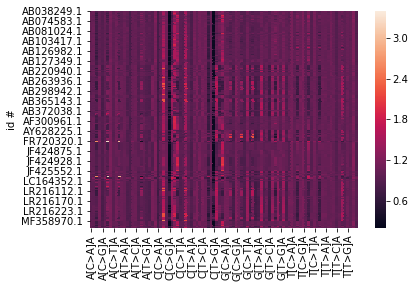

In [31]:
import seaborn as sns
%matplotlib inline

sns.heatmap(mutations_df) #don't think this is actually valuable 

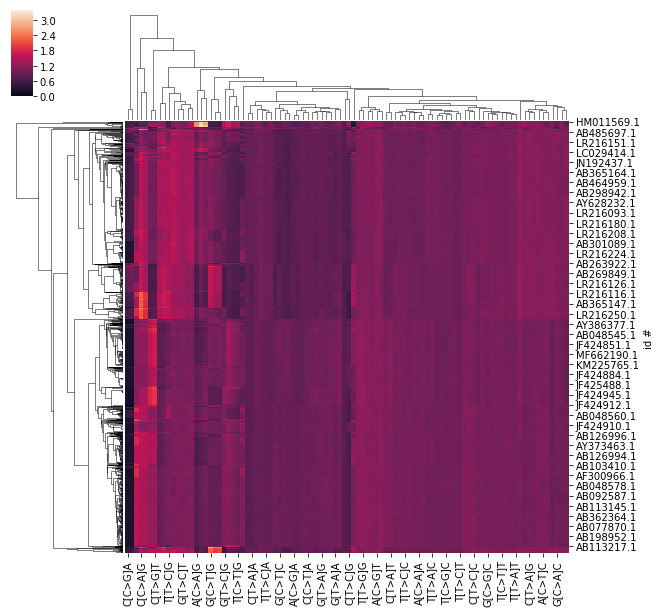

In [32]:
sns.clustermap(mutations_df_noNA)

## Dimensionality reduction tests. It's def necessary

Dimensionality (1154, 96)
Pairwise distances:


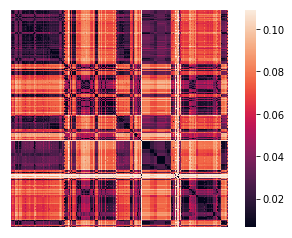

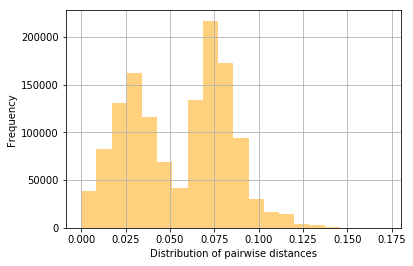

CPU times: user 1.73 s, sys: 133 ms, total: 1.86 s
Wall time: 1.93 s


In [33]:
%%time
print("Dimensionality", mutations_df_noNA.shape)
D = sklearn.metrics.pairwise_distances(mutations_df_noNA, metric='braycurtis', n_jobs=-1)
print("Pairwise distances:")
sns.heatmap(D, robust=True, square=True, yticklabels=False, xticklabels=False, cbar=True)
plt.show()

plt.hist(np.hstack(D), 20, facecolor='orange', alpha=0.5)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

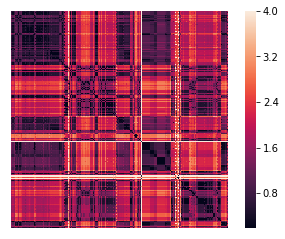

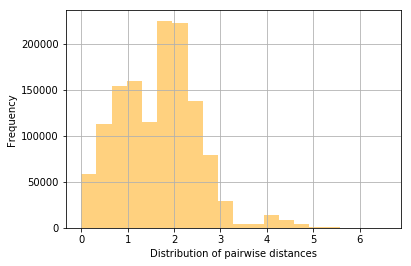

In [34]:
E = sklearn.metrics.pairwise.euclidean_distances(mutations_df_noNA)

sns.heatmap(E, robust=True, square=True, yticklabels=False, xticklabels=False, cbar=True)
plt.show()

plt.hist(np.hstack(E), 20, facecolor='orange', alpha=0.5)
plt.xlabel('Distribution of pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [35]:
#CLASS CODE#### ~for below cell
def scatterplot_2D(R, title, labels=None):
    """ Helper function to plot data points in 2D
        Requires (N, 2) numpy array shape
    """
    assert(R.shape[1] == 2)
    # class labels are turned into colors
    if labels is None:
        c = 'black'
    else:
        color_scale = np.linspace(0, 1, len(set(labels)))
        c = [plt.cm.Set1(color_scale[i]) for i in labels]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    ax.scatter(R[...,0], R[...,1], color=c)
    ax.axis('square')
    ax.set_xlabel('R1')
    ax.set_ylabel('R2')
    fig.suptitle(title)
    plt.show()

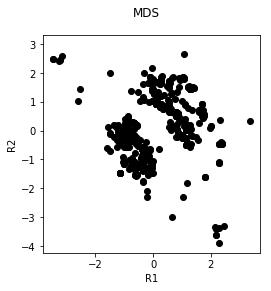

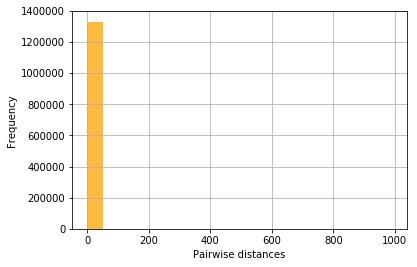

In [36]:
# non-linear transformations:
from sklearn.manifold import MDS, Isomap, TSNE

R_MDS = MDS(n_components=2).fit_transform(mutations_df_noNA)
scatterplot_2D(R_MDS, 'MDS') 


E = sklearn.metrics.pairwise_distances(R_MDS, metric='braycurtis', n_jobs=-1)
# sns.heatmap(D, robust=True, square=True, yticklabels=True, xticklabels=True, cbar=True)
# plt.show()

plt.hist(np.hstack(E), 20, facecolor='orange', alpha=0.75)
plt.xlabel('Pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

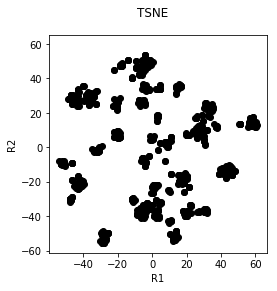

In [37]:
R_TSNE = TSNE(n_components=2, perplexity=20).fit_transform(mutations_df_noNA)
scatterplot_2D(R_TSNE, 'TSNE') #once I define y in np array: scatterplot_2D(R_TSNE, 'TSNE', y), y for colour

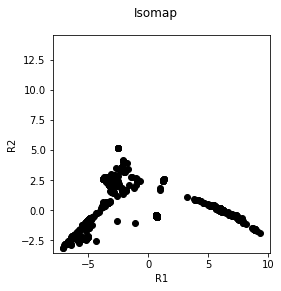

In [38]:
R_ISO = Isomap(n_components=2).fit_transform(mutations_df_noNA)
scatterplot_2D(R_ISO, 'Isomap') #scatterplot_2D(R_ISO, 'Isomap', y)

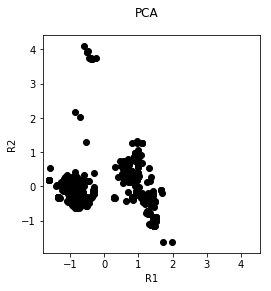

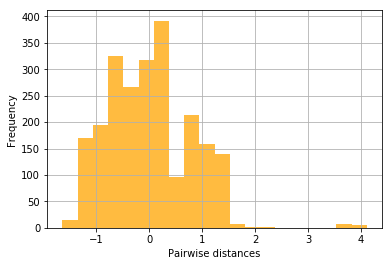

In [39]:
PCA = sklearn.decomposition.PCA(n_components=2).fit_transform(mutations_df_noNA)
scatterplot_2D(PCA, 'PCA') #scatterplot_2D(R_ISO, 'Isomap', y)


E = sklearn.metrics.pairwise_distances(PCA, metric='braycurtis', n_jobs=-1)
# sns.heatmap(D, robust=True, square=True, yticklabels=True, xticklabels=True, cbar=True)
# plt.show()

plt.hist(np.hstack(PCA), 20, facecolor='orange', alpha=0.75)
#plt.hist(np.hstack(E), 20, facecolor='orange', alpha=0.75)
plt.xlabel('Pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



## We choose TSNE as DR method, moving on to cluster testing now

In [40]:
###THIS CODE IS NOT MINE, FROM CLASS##### #this is necessary for below of using kmeans
import matplotlib.pyplot as plt
%matplotlib inline

def plot_kmeans(original_data, cluster_labels, model, k):
    """Plot the clusters and centroids for a model trained on the Iris dataset."""
    # Scatter plots of each species
    for cluster_idx in range(k):
        plt.scatter(
            original_data.iloc[cluster_labels == cluster_idx, 0],
            original_data.iloc[cluster_labels == cluster_idx, 1],
            label="Cluster #{}".format(cluster_idx),
        )
    plt.legend()
    #plt.scatter(original_data[cluster_labels == 1, 0], original_data[cluster_labels == 1, 1], s = 100, c = 'blue', label = 'Species 1')

    # Add centroids to plot
    plt.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        s=100,
        c='red',
    )

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=100)
df_1_tsne = tsne.fit_transform(mutations_df_noNA) #the DR
print(df_1_tsne.shape)

(1154, 2)


In [42]:
#We'll come back to this

#tsne 
model.fit(df_1_tsne)
cluster_labels = model.predict(df_1_tsne)
plot_kmeans(pd.DataFrame(df_1_tsne), cluster_labels, model,3)

NameError: name 'model' is not defined

###  just regular PCA

In [43]:
#dimensionality reduction on PCA

from sklearn.decomposition import PCA
PCA = PCA(n_components=2)
df_1_PCA = PCA.fit_transform(mutations_df_noNA) #the DR
print(df_1_PCA.shape)

(1154, 2)


In [84]:
#for extrapolating what influences cluster generation the most
PCA_components = pd.DataFrame(PCA.components_,columns=mutations_df_noNA.columns ,index = ['PC-1','PC-2'])
PCA_components.to_csv("./PCA_components.csv")

In [82]:
#print(pd.DataFrame(TSNE.components_,columns=mutations_df_noNA.columns ,index = ['PC-1','PC-2']))

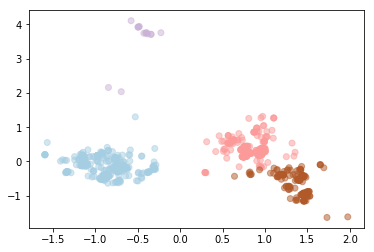

In [101]:
#kmeans
from sklearn.cluster import KMeans
ktest = KMeans(n_clusters=4, random_state=50).fit_predict(df_1_PCA) #using DR here see
plt.subplot()
plt.scatter(df_1_PCA[:, 0], df_1_PCA[:, 1], cmap='Paired', c=ktest, alpha = 0.5) 

In [ ]:
#kmeans
from sklearn.cluster import KMeans
ktest = KMeans(n_clusters=10, random_state=50).fit_predict(df_1_tsne) #using DR here see
plt.subplot()
plt.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], cmap='Paired', c=ktest, alpha = 0.5) 

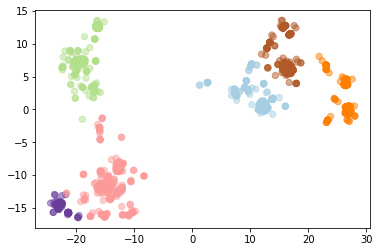

In [46]:
#regular GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6).fit(df_1_tsne)
labels = gmm.predict(df_1_tsne)
plt.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], c=labels, s=40, cmap='Paired', alpha = 0.5)

## Analysis of how many clusters to use

In [ ]:
#below is better code from scikit, produces a slightly different output, but still the same conclusion of max 6 clusters. 
#5 may be better owing to size of plot bars being more similar thatn with c = 6, and the one cluster bar being far over avg silohuette score = overfitting (?)
#matches the silhoette line plot above, not elbow though 
##can replace df_1_tsne with df_1_mds to view that. The results do not look as good as tsne (only a few clusters reasonably above averge, until higher # [overfitting]) 

In [ ]:
###code not mine, from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html####

from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)


range_n_clusters = [3, 4, 5, 6, 7, 8, 9,10,11,12]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_1_tsne) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=100)
    cluster_labels = clusterer.fit_predict(df_1_tsne)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_1_tsne, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_1_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## April 2019 updates

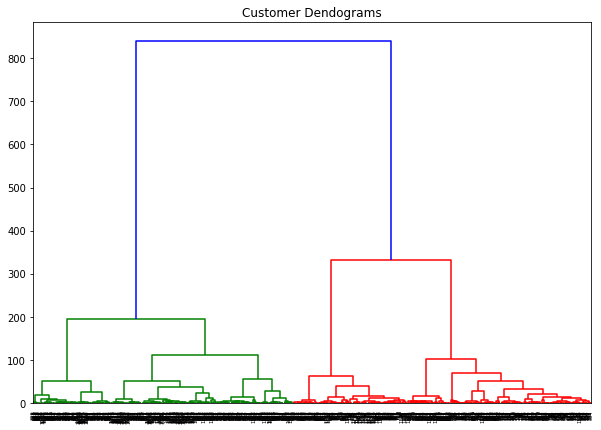

In [48]:
#Histogram for the cluster way we choose
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df_1_tsne, method='ward'))  

In [62]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
#centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(df_1_PCA, centers=centers, cluster_std=0.5)

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

ValueError: too many values to unpack (expected 2)

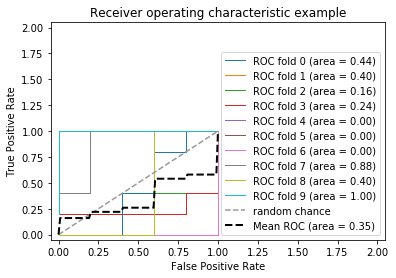

In [69]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

###############################################################################
# Data IO and generation

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

X = df_1_tsne
###############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(y, n_folds=10)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='random chance')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 2.05])
plt.ylim([-0.05, 2.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [49]:
#Actually need those model stats now

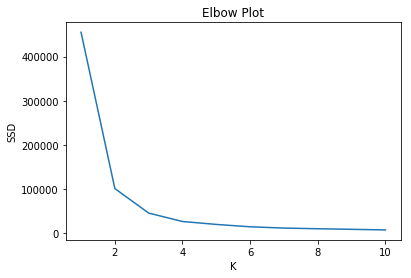

In [50]:
#Elbow method ##class code

def plot_elbow(dataset, max_clusters):
    """Plot elbow curve for k-means."""
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=768797)
        kmeans.fit(dataset)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertias)
    plt.title("Elbow Plot")
    plt.xlabel("K")
    plt.ylabel("SSD")

plot_elbow(df_1_tsne, 10)


/Users/belfordak/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


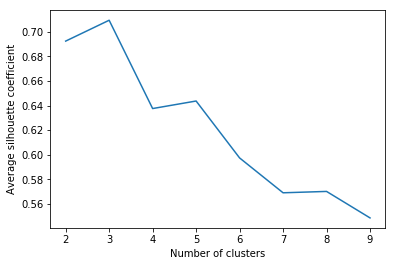

In [51]:
# Silhouette is used for assessing the performance of an unlabeled dataset ##class code
# this is what's shown above in the graphs

from sklearn.metrics.cluster import silhouette_score

def calc_silhouette(dataset, n):
    """Runs Kmeans clustering and returns average silhouette coefficient"""    
    kmeans = KMeans(n_clusters=n).fit(df_1_tsne)
    score = silhouette_score(df_1_tsne, kmeans.labels_)
    return score

scores = {n: calc_silhouette(df_1_tsne, n) for n in range(2, 10)}
# pprint.pprint(scores)
plt.plot(
    list(scores.keys()),
    list(scores.values())
)

plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette coefficient")
plt.show()

In [63]:
#AUC / ROC
#ROC CURVE WITH AUC SCORES

# Classification and ROC analysis
from sklearn.cross_validation import StratifiedKFold
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


/Users/belfordak/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


TypeError: __init__() got an unexpected keyword argument 'n_splits'

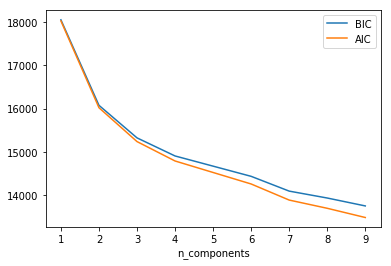

In [53]:
#AIC BIC
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_1_tsne)
          for n in n_components]

plt.plot(n_components, [m.bic(df_1_tsne) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_1_tsne) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [ ]:
#IDK man this is confusing

# Build a classification task using 5 informative features
X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=30, n_informative=5,
                           n_redundant=4, n_repeated=0, n_classes=4,
                           n_clusters_per_class=1, random_state=0,
                                           class_sep=0.2)

# Create the RFE object and compute a cross-validated score.
svc = sklearn.svm.SVC(kernel="linear", class_weight="balanced")
rfecv = sklearn.feature_selection.RFECV(estimator=svc,
                                        step=1,
                                        cv=sklearn.model_selection.StratifiedKFold(2),
                                        scoring='accuracy')
rfecv.fit(X, y)

print("Number of features corresponding to max CV score : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (# of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [54]:
from sklearn import decomposition
pca = PCA(n_components=2)
pca.fit(mutations_df_noNA)
PCA(copy=True, n_components=2, whiten=False)
X = pca.transform(mutations_df_noNA)


TypeError: 'PCA' object is not callable

### 3D tsne for fun

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*tsne))
plt.show()

#plt.scatter(*zip(*tsne[:,:2]), c=X[:,2])
#plt.scatter(*zip(*tsne[:,:2]), c=X[:,2], cmap='RdBu')

## Predicting

In [85]:
id_index = mutations_df_noNA.index # DO I WANT THIS AS TRINUCLS OR MUTS.....

In [109]:
y_pred = KMeans(n_clusters=8, random_state=160).fit_predict(df_1_tsne)

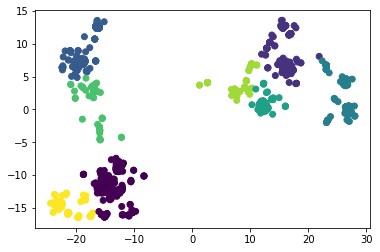

In [110]:
plt.subplot()
plt.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], c=y_pred) #this is the full df, it was reduced to two columns
#this is all just a one line version of what we decided above

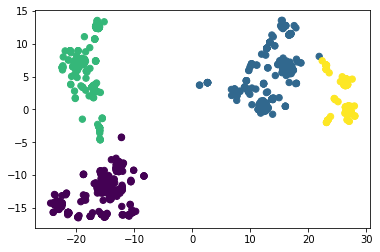

In [89]:
#but if we wanted to look at another method one more time (GMM)
gmm = GaussianMixture(n_components=4).fit(df_1_tsne)
labels = gmm.predict(df_1_tsne)
plt.scatter(df_1_tsne[:, 0], df_1_tsne[:, 1], c=labels, s=40)

## Model evaluation - this method is not fully completed, to get true cluster validation, I need to pull which datasets this subset coresponds to and see if clustering matches with the full dataset


In [ ]:
#Running the model with different data (same data split/changed) 

In [104]:
from sklearn.model_selection import train_test_split
test_1, test_2 = train_test_split(df_1_tsne, shuffle=False)

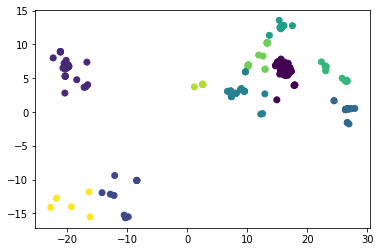

In [105]:
y_pred_test_2 = KMeans(n_clusters=10, random_state=160).fit_predict(test_2)
plt.scatter(test_2[:, 0], test_2[:, 1], c=y_pred_test_2)

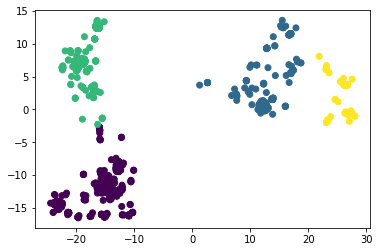

In [92]:
y_pred_test_1 = KMeans(n_clusters=4, random_state=160).fit_predict(test_1)
plt.scatter(test_1[:, 0], test_1[:, 1], c=y_pred_test_1)

In [ ]:
#different method from above

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    df_1_tsne, df_1_tsne)

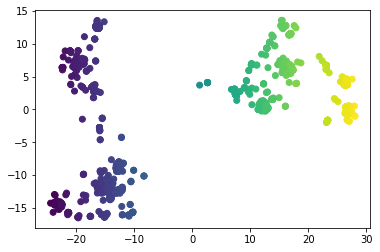

In [94]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=X_train[:,0])

In [95]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(865, 2) (865, 2)
(289, 2) (289, 2)


In [96]:
model_testing = model.fit(X_train, y_train)
predictions = kmeans.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, X_train)
D
#accuracy_score(y_true, y_pred, normalize=False)


## Reassigning clusters to viruses (assumes dimensionality reduction did not change the order of the viruses/index)

In [ ]:
#..does tsne reorder data.....?

In [106]:
y_pred.shape
y_pred

array([0, 0, 9, ..., 4, 4, 3], dtype=int32)

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

NameError: name 'digits' is not defined

In [107]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

NameError: name 'digits' is not defined

In [111]:
#DR order retained
yp = list(y_pred)
namestemp =  list(id_index)
clusterstemp = list(y_pred)
#clusterstemp

clustname = zip(namestemp, clusterstemp)
final_out = list(zip(namestemp, clusterstemp))
df_f_o = pd.DataFrame(final_out)

df_f_o.head()
df_f_o.to_csv("./8_clusts_full_genome_clusters_match.csv")